#### 回答一些基本问题
1. 申请专业、就业问题
2. 这周以及下周计划
这周周六周日： 时间序列分析（第一部分），系统设计知识

时间序列分析 - 编程、数学 （金融工程）
系统设计 - 编程、设计（BA/IS）

下周需要完成midterm

下周安排one on one catchup

下周六周日 
时间序列分析(第二部分），具体项目的知识串联和架构，小组共同完成（计划）

（1）爬虫系统 （数据ETL，系统设计，网络知识） ==》 数据科学/BA/IS
（2）实时数据转换系统 （数据ETL，数据库知识，系统设计） ==》 数据科学/金融工程
（3）交易策略分析 （数据库知识，时间序列分析） ==》 金融工程/数学/数据科学


#### 讲解作业
class 2

#### 布置 midterm
10 questions -> 
    5 + 1 python
    4 numpy + pandas 
    2 SQL questions

#### 分析week3作业


#### 时间序列分析(第一部分）


In [2]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
file = "eod_financial_instruments_data.csv"
f = open(file, 'r')
f.readlines()[:5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n']

In [5]:
data = pd.read_csv(file, index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [6]:
data.head() # or tail

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0aa5a3240>,
      dtype=object)

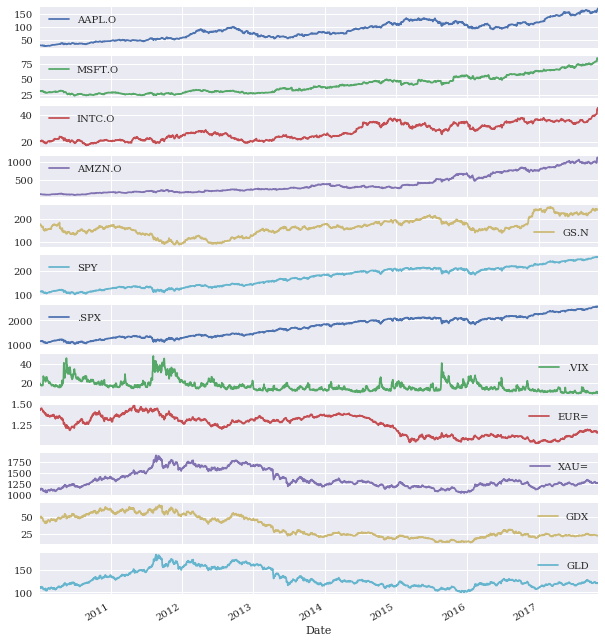

In [8]:
data.plot(figsize=(10, 12), subplots=True)

In [9]:
instruments = ['Apple Stock', 'Microsoft Stock', 'Intel Stock', 'Amazon Stock', \
               'Goldman Sachs Stock', 'SPDR S&P 500 ETF Trust', 'S&P 500 Index', \
               'VIX Volatility Index', 'EUR/USD Exchange Rate', 'Gold Price',\
               'VanEck Vectors Gold Miners ETF', 'SPDR Gold Trust' ]

In [11]:
for symbol, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(symbol, name)) 

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [12]:
# Summery Statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [14]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [15]:
data.mean()

AAPL.O      86.530152
MSFT.O      40.586752
INTC.O      27.701411
AMZN.O     401.154006
GS.N       163.614625
SPY        172.835399
.SPX      1727.538342
.VIX        17.209498
EUR=         1.252613
XAU=      1352.471593
GDX         34.499391
GLD        130.601856
dtype: float64

In [16]:
data.aggregate([min, np.mean, np.std, np.median, max])

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.190000,1.038500,1051.360000,12.470000,100.500000
mean,86.530152,40.586752,27.701411,401.154006,163.614625,172.835399,1727.538342,17.209498,1.252613,1352.471593,34.499391,130.601856
std,34.043491,14.394848,5.950847,257.115788,37.165334,42.325489,424.345659,5.918398,0.117224,195.383137,15.435140,19.455291
median,84.632058,36.540000,26.410000,306.425000,162.090000,178.805000,1783.810000,15.650000,1.288400,1288.820000,26.594000,123.895000
max,169.040000,83.890000,45.490000,1110.850000,252.890000,257.710000,2581.070000,48.000000,1.482600,1897.100000,66.630000,184.590000


In [17]:
# Change over the time
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55


In [18]:
data.diff().mean()

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64

In [19]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005


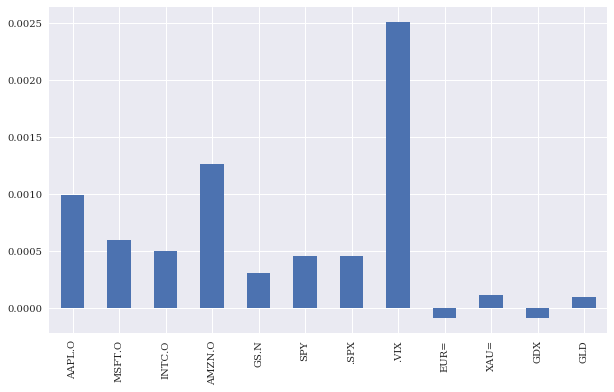

In [22]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [30]:
# https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers
rets = np.log(data / data.shift(1))
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.050,0.007,0.004,0.015,0.005


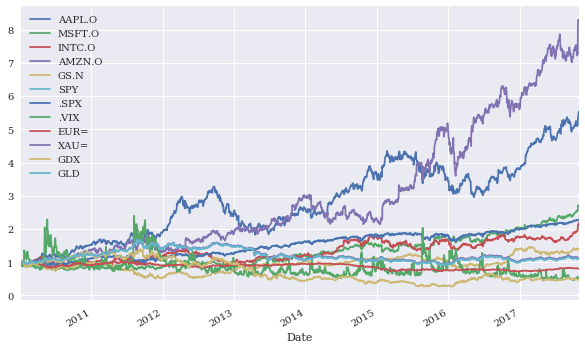

In [31]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))


In [44]:
# Resampling
# up/down sampling
# https://blog.csdn.net/kylin_learn/article/details/85223409
data.resample('1m').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2267,1213.81,49.86,118.881


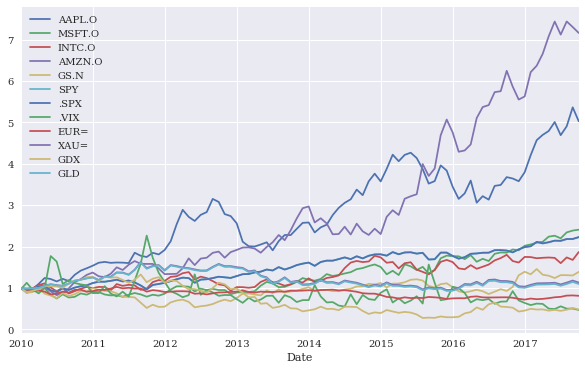

In [74]:
rets.cumsum().apply(np.exp).resample('1m', label='right').first().plot(figsize=(10,6))
# after class, for financial data we use right + last, why?

In [48]:
# Rolling Statistics
sym = 'AAPL.O'
aapl = pd.DataFrame(data[sym]).dropna()
aapl.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


In [52]:
# standard rolling statistics
window = 20 #252
aapl['min'] = aapl[sym].rolling(window=window).min()
aapl['mean'] = aapl[sym].rolling(window=window).mean()
aapl['std'] = aapl[sym].rolling(window=window).std()
aapl['median'] = aapl[sym].rolling(window=window).median()
aapl['max'] = aapl[sym].rolling(window=window).max()
aapl['ewma'] = aapl[sym].ewm(halflife=0.5, min_periods=window).mean()
# https://blog.csdn.net/mzpmzk/article/details/80085929

In [53]:
aapl.head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,NaN,NaN,NaN,NaN,NaN,NaN


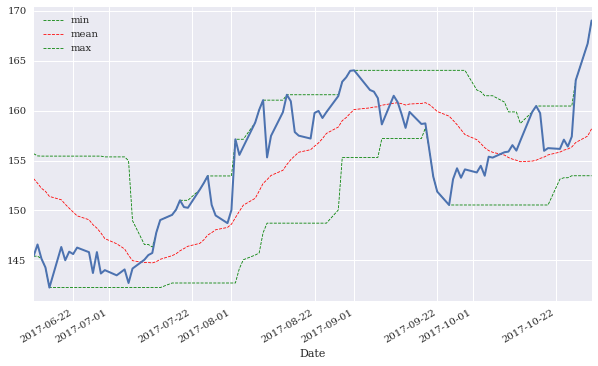

In [55]:
ax = aapl[['min', 'mean', 'max']].iloc[-100:].plot(figsize=(10,6),style=['g--','r--','g--'], lw=0.8)
aapl[sym].iloc[-100:].plot(ax=ax, lw=2.0)

In [56]:
# Technical Analysis Example
# https://zhuanlan.zhihu.com/p/38448602


In [61]:
aapl['SMA1'] = aapl[sym].rolling(window=42).mean() #short term, 2 month
aapl['SMA2'] = aapl[sym].rolling(window=252).mean() #long term, 1y


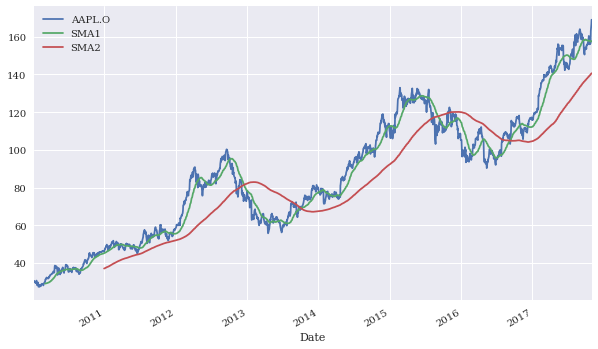

In [63]:
aapl[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

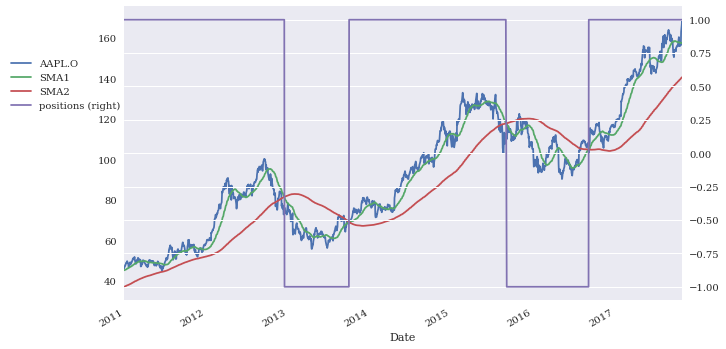

In [67]:
aapl.dropna(inplace=True)
aapl['positions'] = np.where(aapl['SMA1'] > aapl['SMA2'], 1, -1) # 1 for long -1 for short
ax = aapl[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.01, 0.85))

In [68]:
# Correlation
pair = data[['.SPX', '.VIX']].dropna()

In [69]:
pair.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a3d39710>,
      dtype=object)

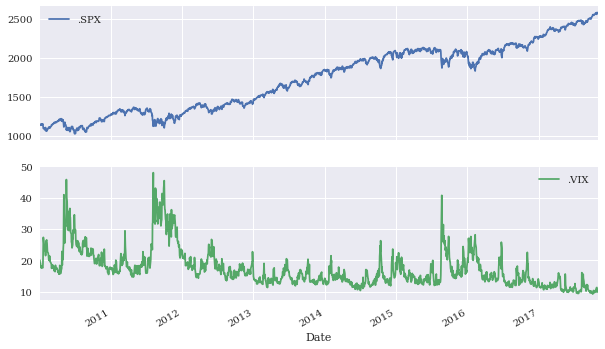

In [71]:
pair.plot(subplots=True, figsize=(10,6))

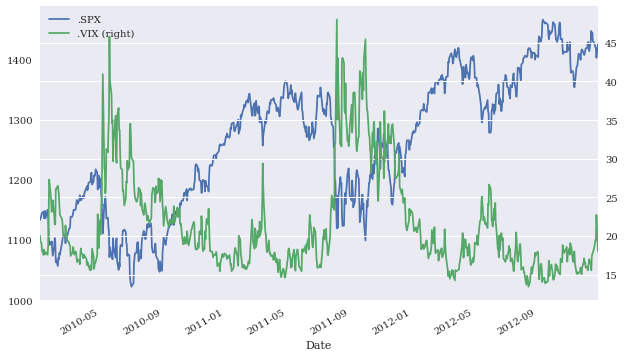

In [73]:
pair.loc[:'2012-12-31'].plot(secondary_y='.VIX',figsize=(10, 6))

In [76]:
# Log Returns
rets = np.log(pair / pair.shift(1))
rets.head(3)

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868


In [78]:
rets.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a3a38978>,
      dtype=object)

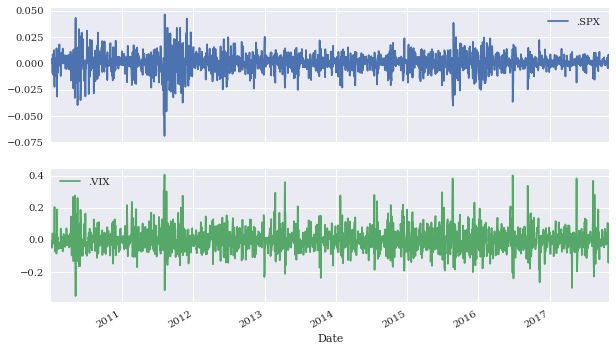

In [79]:
rets.plot(subplots=True, figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a3961780>,
      dtype=object)

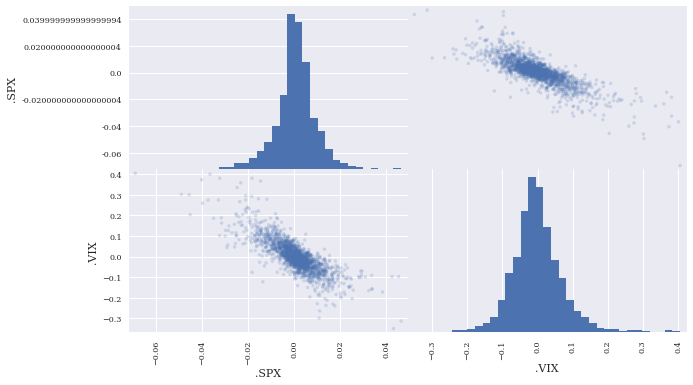

In [80]:
# Log returns of the S&P 500 and VIX as a scatter matrix
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35},  figsize=(10, 6))

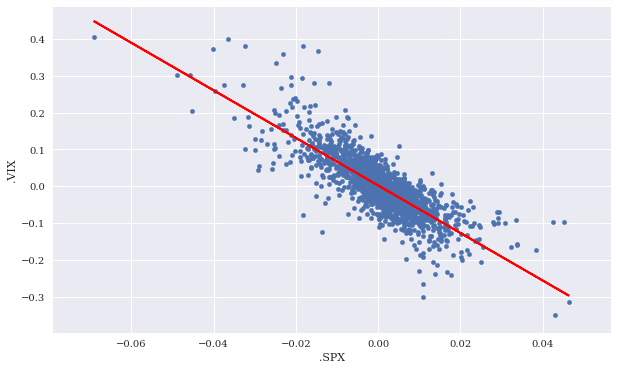

In [82]:
# AB testing
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  

# The slope is obviously negative, providing support for the stylized fact about the negative correlation between 
# the two indices


In [83]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


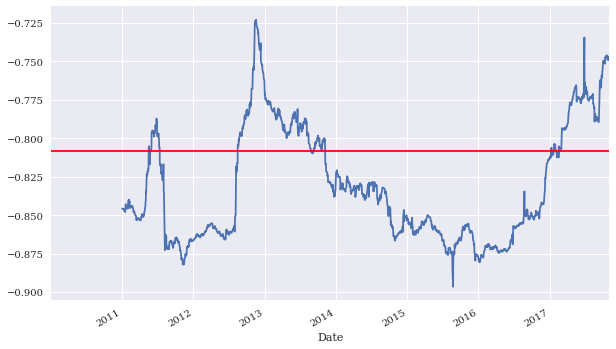

In [84]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r')

In [200]:
# https://blog.csdn.net/frankiehello/article/details/86766625
fi = data['.VIX'][100: 500]
fi.dropna()

# Augmented Dickey-Fuller (ADF) Test
import statsmodels.tsa.stattools as ts
ts.adfuller(fi, 1)

(-2.740443565330067,
 0.06729739967140226,
 1,
 398,
 {'1%': -3.4468876315017423,
  '5%': -2.868829424528516,
  '10%': -2.570653059771218},
 1739.5388777422745)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe09f1c4320>],
      dtype=object)

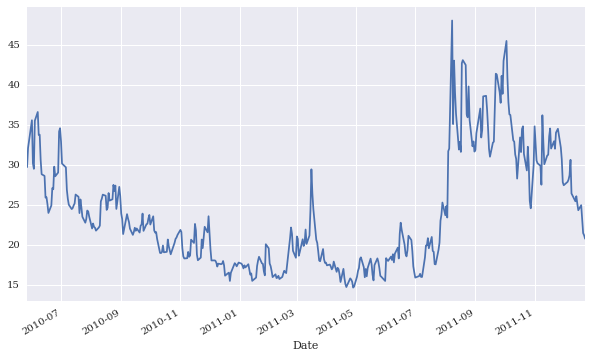

In [201]:
# https://www.jianshu.com/p/9066b9e0c7af
data.head()
fi.plot(subplots=True, figsize=(10, 6))

In [203]:
from __future__ import print_function
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
gbm = log(cumsum(randn(100000))+1000)
mr = log(randn(100000)+1000)
tr = log(cumsum(randn(100000)+1)+1000)

print("Hurst(GBM):%s" % hurst(gbm))
print("Hurst(MR): %s" % hurst(mr))
print("Hurst(TR): %s" % hurst(tr))

# https://zhuanlan.zhihu.com/p/38282038

Hurst(GBM):0.5083622206679249
Hurst(MR): -0.00024279667717425174
Hurst(TR): 0.9532801049062735


In [ ]:
# trading pairs
https://blog.csdn.net/hongXkeX/article/details/89310367
https://blog.csdn.net/hongxkex/article/details/90108038

In [87]:
# 时间序列有局限性 - 理论研究/实际应用
# Stochastic Process
# random numbers -> random walk
# Markov property - one day dependency - memoryless
# Black-Scholes-Merton pricing 

# 机器学习是新方向 Supervised and Unsupervised Learning
# prediction & classification
# statsmodels & scikit-learn
# https://zh.wikipedia.org/wiki/%E5%AE%89%E5%BE%B7%E6%A3%AE%E9%B8%A2%E5%B0%BE%E8%8A%B1%E5%8D%89%E6%95%B0%E6%8D%AE%E9%9B%86
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [204]:
# LinearRegression 
# http://desktop.arcgis.com/zh-cn/arcmap/10.3/tools/spatial-statistics-toolbox/regression-analysis-basics.htm
eur = pd.DataFrame(data['EUR='])
eur['returns'] = np.log(eur/eur.shift(1))
eur.dropna(inplace=True)
eur['direction'] = np.sign(eur['returns']).astype(int)

# https://math.stackexchange.com/questions/2548314/what-is-lag-in-a-time-series
# auto correction
cols = ['lag_1', 'lag_2']
eur['lag_1'] = eur['returns'].shift(1)
eur['lag_2'] = eur['returns'].shift(2)
eur.dropna(inplace=True)
eur.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984


In [206]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

eur['pos_ols_1'] = model.fit(eur[cols], eur['returns']).predict(eur[cols])
eur['pos_ols_2'] = model.fit(eur[cols], eur['direction']).predict(eur[cols])
eur.head()

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2
Date,,,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-0.000202,-0.004063
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,0.000046,0.043384
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-0.000310,-0.019115
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-0.000143,-0.042655
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984,0.000007,0.005976


In [209]:
eur[['pos_ols_1', 'pos_ols_2']] = np.where(eur[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)
eur['pos_ols_2'].value_counts()
(eur['pos_ols_2'].diff() != 0).sum()

789

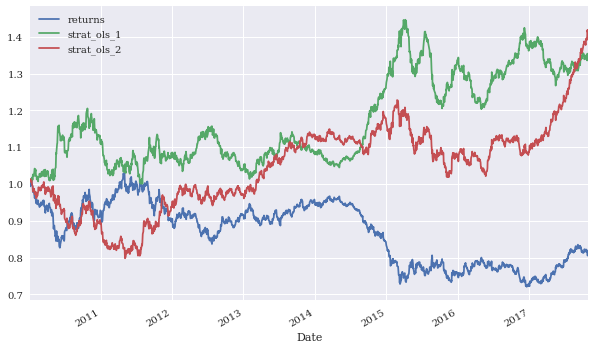

In [176]:
eur['strat_ols_1'] = eur['pos_ols_1'] * eur['returns']
eur['strat_ols_2'] = eur['pos_ols_2'] * eur['returns']
eur[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)
eur[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [210]:
# Unsupervised learning
# KMeans https://blog.csdn.net/sinat_29957455/article/details/80113972
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(eur[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++',
       max_iter=300, n_clusters=2, n_init=10, n_jobs=None, 
       precompute_distances='auto', random_state=0, 
       tol=0.01, verbose = 0)

eur['pos_clus'] = model.predict(eur[cols])
eur['pos_clus'] = np.where(eur['pos_clus'] == 1, -1, 1)


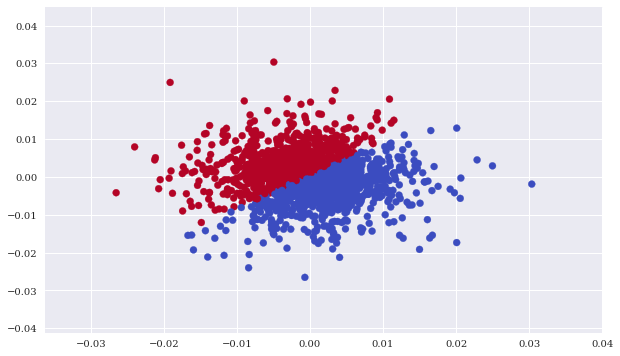

In [214]:
eur['pos_clus'].values
plt.figure(figsize=(10, 6))

plt.scatter(eur[cols].iloc[:, 0], eur[cols].iloc[:, 1], c=eur['pos_clus'], cmap='coolwarm')

In [215]:
eur['strat_clus'] = eur['pos_clus'] * eur['returns']
eur[['returns', 'strat_clus']].sum().apply(np.exp)

returns       0.807938
strat_clus    1.415864
dtype: float64

In [216]:
(eur['direction'] == eur['pos_clus']).value_counts()

True     999
False    970
dtype: int64

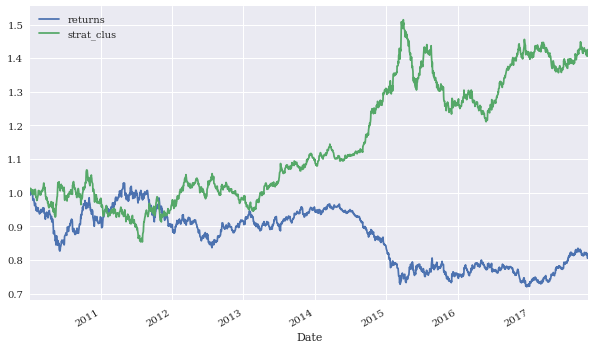

In [217]:
eur[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [ ]:
##Data Set
 Yahoo Finance - http://finance.yahoo.com
 Google Finance - https://www.google.com/finance
 QuantQuote - https://www.quantquote.com (S&P500 EOD data only)
 EODData - http://eoddata.com (requires registration)
 Quantdl - https://www.quandl.com/
    
Market Instruments
Equities/Indices Stock, ETFs, Futures, Options
Foreign Exchange Margin/Spot
Commodities Futures, Options
Fixed Income Futures, Options
    

In [ ]:
# Measurements and risk control
Alpha
Beta
Sharpe-ratio

Equity Curve / Drawdown Curve
# https://qutke.com/articles/57c2e4c6a43ce1cd0833cb25
Value-at-Risk
# https://zhuanlan.zhihu.com/p/22015217


In [ ]:
https://github.com/Lucas-Kohorst/Python-Stock/blob/master/StocksStart.py

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [ ]:
phase one: next week
    sort out problem set and expect outcome
    
phase two: start next saturday
    sort out design and submit to github we will review
    
phase three: implementation 
    sort out next next week and submit to github

